# The Gumbel Distribution

In [1]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt

## Plot the cdf and the pdf

In [2]:
def gumbelCDF(x, mu=0, beta=1):
    return np.exp(-np.exp(-(x-mu)/beta))

def gumbelInverseCDF(x, mu=0, beta=1):
    return mu - beta*np.log(-np.log(x))

def gumbelPDF(x, mu=0, beta=1):
    z = (x-mu)/beta
    return 1.0/beta * np.exp(-(z+np.exp(-z)))

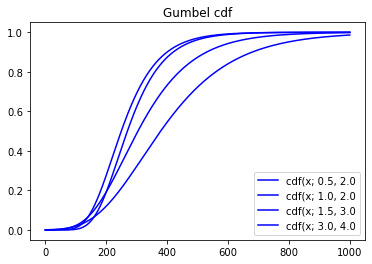

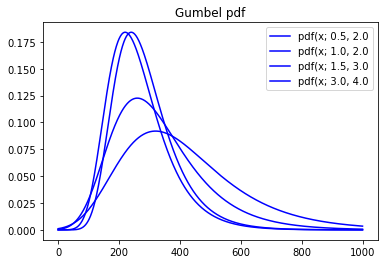

In [3]:
x = np.linspace(-5,20,1000)
mus = [0.5, 1.0, 1.5, 3.0]
betas = [2,2,3,4]

for mu, beta in zip(mus, betas):
    plt.plot(gumbelCDF(x, mu, beta), '-b', label="cdf(x; %.1f, %.1f"%(mu, beta))
plt.title("Gumbel cdf")
plt.legend()
plt.show()

for mu, beta in zip(mus, betas):
    plt.plot(gumbelPDF(x, mu, beta), '-b', label="pdf(x; %.1f, %.1f"%(mu, beta))
plt.title("Gumbel pdf")
plt.legend()
plt.show()



## Generate and plot a 1d discrete distribution $p$

In [4]:
def generateDiscrete1D(n, min=1, max=20):
    vals = npr.randint(low=min, high=max, size=n)
    return vals#/np.sum(vals)

def plot1D(p):
    plt.bar(np.arange(len(p)), p)
    plt.show()

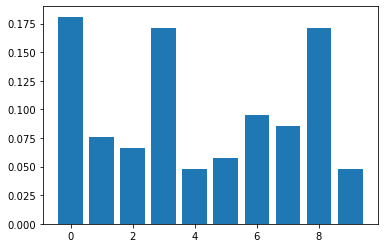

In [5]:
N = 10
vals = generateDiscrete1D(N)
p = vals/np.sum(vals)
plot1D(p)

## Sample from $p$ using the Gumbel-max trick and plot the histogram of the sam

In [6]:
def sampleWithGumbelNoise(logits):
    noise = gumbelInverseCDF(npr.uniform(size=len(logits)))
    return np.argmax(logits+noise)

def estimate1DLogZ(logits):
    noise = gumbelInverseCDF(npr.uniform(size=len(logits)), mu=-.5772)
    return np.max(logits+noise)

(array([0.158, 0.094, 0.06 , 0.17 , 0.041, 0.074, 0.086, 0.089, 0.185,
        0.043]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <BarContainer object of 10 artists>)

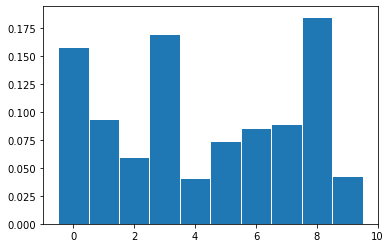

In [7]:
samples = [sampleWithGumbelNoise(np.log(vals)) for _ in range(1000)]
plt.hist(samples, bins=np.arange(N + 1), align='left', edgecolor='white', density=True)

## Approximate the partition function $Z$
Here we use the max-statistic property of the Gumbel distribution,
namely the fact that the expectation of the max of the $Gumbel(c)$ perturbed
potential function is distributed according to $Gumbel(log Z)$,
where $Z$ is the partition function (normalizing constant) and $c\approx 0.5772$ is the Euler constant.

We use Monte Carlo to approximate the expection.

In [8]:
logZ = np.mean([estimate1DLogZ(np.log(vals)) for _ in range(10000)])
logZ, np.exp(logZ), np.sum(vals)

(4.65480183544013, 105.08839314022111, 105)

## Low Dimensional Gumbel Perturbations

### Upperbound? on Z (Hazan13, section 4.1)

In [9]:
def generateDiscrete2D(n, min=1, max=20):
    vals = npr.randint(low=min, high=max, size=(n,2))
    return vals#/np.sum(vals)

In [10]:
vals = generateDiscrete2D(N)
Z = np.sum(vals)
print("Z", Z)
Z

Z 168


168

In [11]:
def estimate2DLogZ(logits):
    noise = gumbelInverseCDF(npr.uniform(size=len(logits)), mu=-.5772)
    noise = noise[:,None]
    noise = np.hstack((noise, noise))
    return np.max(logits+noise,0)

logZ = np.mean([estimate2DLogZ(np.log(vals)) for _ in range(10000)], 1)
np.exp(logZ), Z

(array([ 29.94998735, 923.83331609,  64.67928289, ...,  22.6188684 ,
         25.56191991,  50.0936793 ]),
 168)

In [12]:
np.sum(vals, 1)

array([ 4,  9,  7, 23, 27, 13, 29, 11, 16, 29])